In [1]:
import numpy as np 
import pandas as pd 
import re  # search pattern in string ( text) 
import nltk # nlp 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir(r"C:\Users\Srushti\Desktop\Deep learning and AI\NLP")

In [3]:
farmer=pd.read_csv(r"Farmer.csv")

In [4]:
farmer.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,BeantMrahar,NaN,Twitter for Android,NaN,2021-04-12 03:13:34,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False
1,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:32,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
2,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:21,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,2021-04-12 03:13:21,False,628,"If we lose this fight, first we will become co...",0,False
4,__Argha__,NaN,Twitter for Android,NaN,2021-04-12 03:13:18,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False


In [5]:
data=pd.DataFrame(farmer.text)
data.head()

,text
0,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...
1,Delhi police is the Black Hand of BJP \n#Delhi...
2,Delhi police is the Black Hand of BJP \n#Delhi...
3,"If we lose this fight, first we will become co..."
4,'Disgraceful' and 'Discourteous' act of Delhi ...


In [6]:
data.iloc[0,0]

'Today Hashtag \nRetweet \n\n#DelhiPolice_TorturingFarmers'

In [7]:
data.iloc[2,0]

'Delhi police is the Black Hand of BJP \n#DelhiPolice_TorturingFarmers\n#FarmersProtest https://t.co/N0K2DSR7TR'

# Converted to Lower 

In [8]:
data.text=data.text.str.lower()

In [9]:
data.iloc[2,0]

'delhi police is the black hand of bjp \n#delhipolice_torturingfarmers\n#farmersprotest https://t.co/n0k2dsr7tr'

In [10]:
data.iloc[0,0]

'today hashtag \nretweet \n\n#delhipolice_torturingfarmers'

# Removing Url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [11]:
# data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[1,0]

'delhi police is the black hand of bjp \n#delhipolice_torturingfarmers\n#farmersprotest https://t.co/i0cnvsfqut'

# Remove punctuation

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                         for c in text
                         if c not in string.punctuation])
    return text_nopunt

In [14]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [15]:
data.iloc[1,0]

'delhi police is the black hand of bjp \ndelhipolicetorturingfarmers\nfarmersprotest httpstcoi0cnvsfqut'

# Remove Number

In [16]:
data.iloc[57,0]

'bhupinderq33n tractor2twitr gillsukhmani111 navdeepsingh77 harshkumarbhal1 monicagill1 mahuamoitra… httpstcozolekiijwx'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [17]:
data['text'] = data['text'].str.replace('\d+', '')

C:\Users\Srushti\AppData\Local\Temp/ipykernel_18944/125446536.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+', '')


In [18]:
data.iloc[57,0]

'bhupinderqn tractortwitr gillsukhmani navdeepsingh harshkumarbhal monicagill mahuamoitra… httpstcozolekiijwx'

# Removing Stop Words

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [21]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… httpstcocntiuppxbo'

In [23]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([word 
                                                      for word in x.split() 
                                                      if word not in (stop)]))

In [24]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping… httpstcocntiuppxbo'

# Common Words

In [25]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


{'anacardic',
 'Aphelandra',
 'saponaceous',
 'Crokinole',
 'oversolemn',
 'superserviceably',
 'phylarchical',
 'caseweed',
 'insectivorous',
 'thermometamorphism',
 'simultaneity',
 'volubly',
 'sensationalist',
 'inquisitory',
 'mysidean',
 'maharaja',
 'sniping',
 'statically',
 'inelaborated',
 'unsensitive',
 'schappe',
 'bran',
 'geoagronomic',
 'argute',
 'bubbling',
 'intermediatory',
 'cannulate',
 'stinginess',
 'coparceny',
 'Cipango',
 'schoolboy',
 'noncoinage',
 'unvenerable',
 'polypose',
 'sphacelariaceous',
 'Haemogregarina',
 'fumaroid',
 'pyrrodiazole',
 'Epimachinae',
 'Jorge',
 'oxygenizable',
 'shackling',
 'pimlico',
 'bit',
 'extrusion',
 'spiran',
 'hoax',
 'unintrospective',
 'procommunism',
 'unstanchable',
 'polyfoil',
 'penk',
 'decantate',
 'immarginate',
 'universitize',
 'limacel',
 'borsholder',
 'endospermic',
 'jailward',
 'legibly',
 'whistling',
 'repawn',
 'Heteromera',
 'departmentalism',
 'gie',
 'mesorrhin',
 'cavilingly',
 'outrail',
 'polytri

In [26]:
text=data.text[3]
text

'lose fight first become corporate slaves eventually cornered giving up… httpstcocdryckpjvw'

In [27]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)  #    
    return text

round2 = lambda x: clean_text_round2(x)

In [28]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping… httpstcocntiuppxbo'

In [29]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(round2))
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

# Lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srushti\AppData\Roaming\nltk_data...


In [31]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") ## v = verb  
            for w in w_tokenizer.tokenize(text)]  # word tokenizer

In [32]:
data['text'] = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

# Strip extra whitespace

In [33]:
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

In [34]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

* Finished Data Pre-Processing or Data Cleaning

### Document-Term Matrix

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [35]:
data.head()

,text
0,today
1,black hand
2,black hand
3,lose fight first become corporate eventually c...
4,disgraceful discourteous act towards whose str...


In [36]:
data.text[996]

'abduct torture innocent'

In [37]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.text)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,abuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\Srushti\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Srushti\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Word,freq
651,torture,221
611,support,87
593,stand,86
599,stop,80
47,beat,65
...,...,...
303,humiliate,1
302,humanity,1
300,huge,1
299,hospital,1


# Barplot 

In [41]:
tdm1.head(10)

,Word,freq
651,torture,221
611,support,87
593,stand,86
599,stop,80
47,beat,65
553,shame,62
662,try,57
244,firm,52
331,intimidate,51
169,desperation,51


In [42]:
w = tdm1[tdm1['freq'] >50]
w

,Word,freq
651,torture,221
611,support,87
593,stand,86
599,stop,80
47,beat,65
553,shame,62
662,try,57
244,firm,52
331,intimidate,51
169,desperation,51


C:\Users\Srushti\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Srushti\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


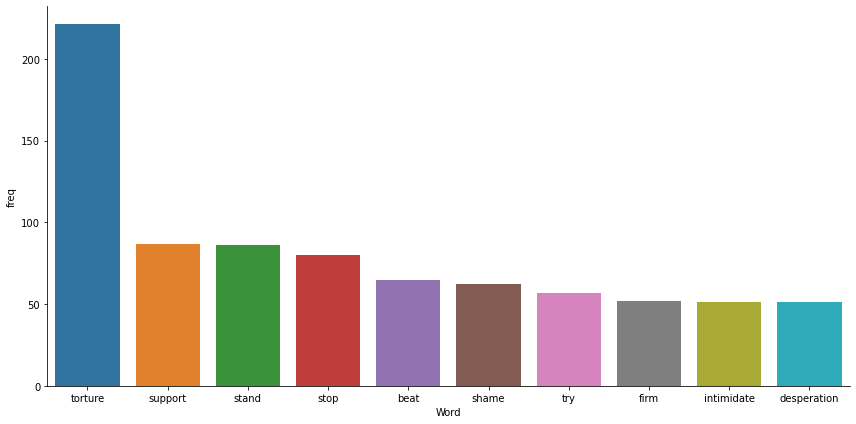

In [43]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [44]:
text=data.text[3]
text

'lose fight first become corporate eventually corner give'

In [45]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 27192 words in the combination of all review.


In [47]:
!pip install wordcloud

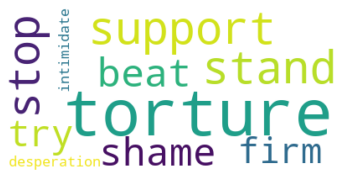

In [48]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                       max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cloud Wordcloud

In [50]:
import os 
os.chdir(r"C:\Users\Srushti\Desktop\Deep learning and AI\NLP") 

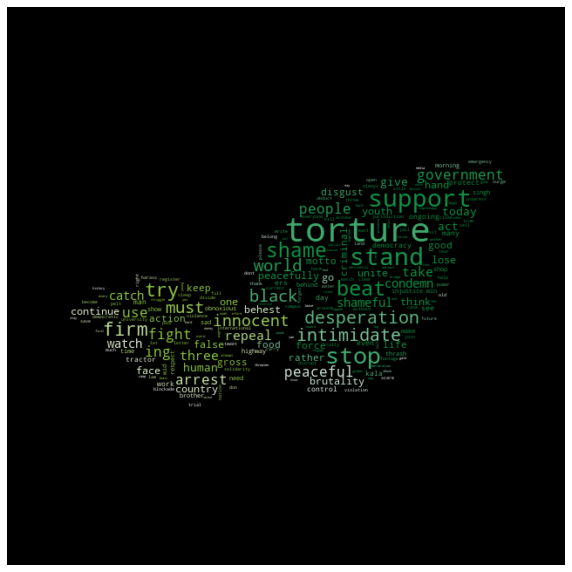

In [52]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("Plant.jpg")) # pixel number
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           mode="RGBA", # combination of colour
                           max_words=27000, 
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

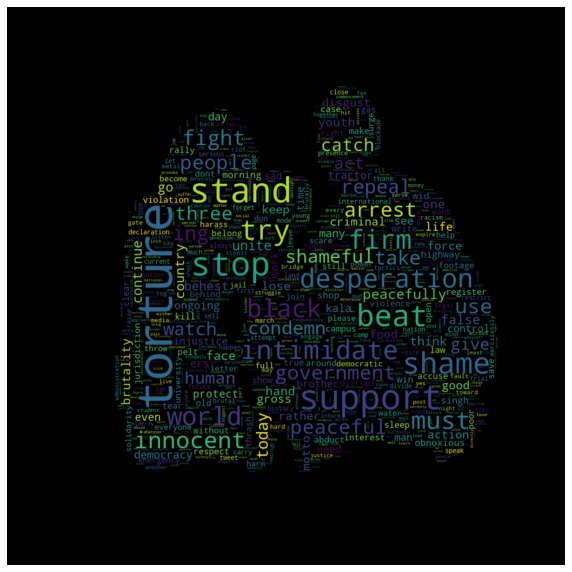

In [53]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("Family.png"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

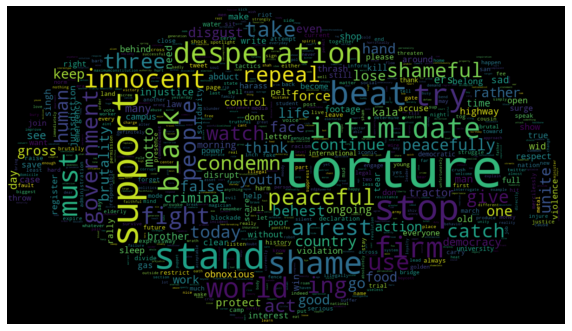

In [59]:
from PIL import Image

mask = np.array(Image.open("mask.jpg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

# Finish